### EDA 

In [27]:
# !pip install datasets
# !pip install pandas matplotlib


In [11]:
from datasets import load_dataset

# https://huggingface.co/datasets/tasksource/esci

# Загружаем тренировочную часть
dataset = load_dataset("tasksource/esci", split="train")

| поле                  | описание                                                                  |
| --------------------- | ------------------------------------------------------------------------- |
| `query`               | пользовательский поисковый запрос                                         |
| `product_title`       | заголовок товара                                                          |
| `esci_label`          | степень релевантности (`Exact`, `Substitute`, `Complement`, `Irrelevant`) |
| `product_description` | описание товара                                                           |
| `product_locale`      | язык/регион товара (например, `us`)                                       |
| `product_id`          | ID товара                                                                 |


In [12]:
import pandas as pd

df = dataset.to_pandas()

# Смотрим основные поля
print(df.columns)

# Пример строки
print(df[['query', 'product_title', 'esci_label']].sample(5))

# Распределение по меткам
print("Метки релевантности:")
print(df['esci_label'].value_counts())

# Распределение по языку
print("Локали:")
print(df['product_locale'].value_counts())

Index(['example_id', 'query', 'query_id', 'product_id', 'product_locale',
       'esci_label', 'small_version', 'large_version', 'product_title',
       'product_description', 'product_bullet_point', 'product_brand',
       'product_color', 'product_text'],
      dtype='object')
                                    query  \
1770264                          wool rug   
113707   ring light 18 inch without stand   
600798     calvin klein dresses for women   
1165269                    kent 700c bike   
1277271          mascarillas para la cara   

                                             product_title  esci_label  
1770264  Fineday Shaggy Rug, Non-Slip Heart Shape Wool ...       Exact  
113707   Neewer Iluminación Kit: 48cm Exterior 55W 5500...  Substitute  
600798   Calvin Klein Women's Tulip Sleeved Sheath Dres...       Exact  
1165269  Lroplie R2 Commuter Aluminum Road Bike 21 Spee...  Substitute  
1277271  Blackhead Mascarillas, Peel off Mascarillas, M...       Exact  
Метки релев

In [28]:
len(df)

2027874

In [13]:
df.head()

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,product_title,product_description,product_bullet_point,product_brand,product_color,product_text
0,0,revent 80 cfm,0,B000MOO21W,us,Irrelevant,0,1,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...
1,291891,bathroom fan without light,13723,B000MOO21W,us,Exact,1,1,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...
2,1,revent 80 cfm,0,B07X3Y6B1V,us,Exact,0,1,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM,Homewerks 7141-80 Bathroom Fan Integrated LED ...
3,2,revent 80 cfm,0,B07WDM7MQQ,us,Exact,0,1,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...
4,3,revent 80 cfm,0,B07RH6Z8KW,us,Exact,0,1,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White,Delta Electronics RAD80L BreezRadiance 80 CFM ...


array([[<Axes: title={'center': 'query_len'}>,
        <Axes: title={'center': 'title_len'}>],
       [<Axes: title={'center': 'desc_len'}>, <Axes: >]], dtype=object)

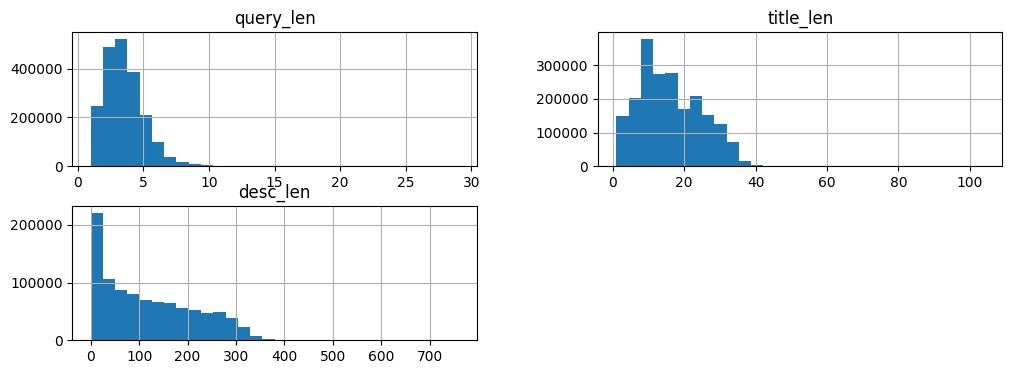

In [17]:
# Распределение длин 

df['query_len'] = df['query'].str.split().str.len()
df['title_len'] = df['product_title'].str.split().str.len()
df['desc_len'] = df['product_description'].str.split().str.len()

df[['query_len', 'title_len', 'desc_len']].hist(bins=30, figsize=(12, 4))

📊 Среднее число релевантных товаров на запрос: 17.460345243843555
🔢 Распределение (включая топ-10):
product_id
16    46897
15    10053
14     5453
13     3624
12     2736
11     2289
40     2267
10     1798
39     1670
9      1599
Name: count, dtype: int64


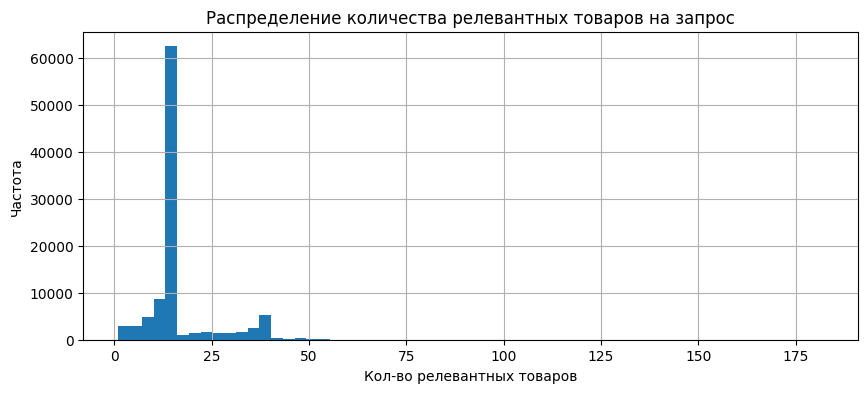

In [ ]:
import matplotlib.pyplot as plt

# Оставим только позитивные примеры
positive_df = df[df['esci_label'].isin(['Exact', 'Substitute'])]

# Считаем количество релевантных товаров на каждый запрос
relevant_counts = positive_df.groupby('query')['product_id'].nunique()

# Статистика
print("📊 Среднее число релевантных товаров на запрос:", relevant_counts.mean())
print("🔢 Распределение (включая топ-10):")
print(relevant_counts.value_counts().head(10))

# Гистограмма
plt.figure(figsize=(10, 4))
relevant_counts.hist(bins=60)
plt.title("Распределение количества релевантных товаров на запрос")
plt.xlabel("Кол-во релевантных товаров")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

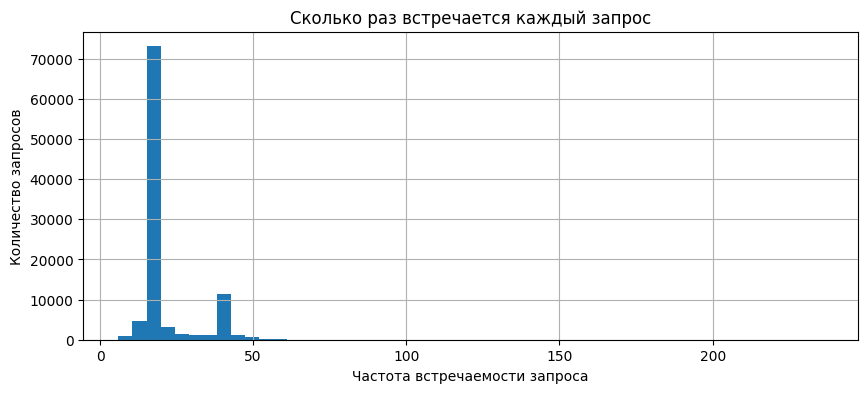

🔝 Топ-10 запросов по количеству появлений:
query
airpods             236
tv                  220
laptop              212
ipad                187
apple watch         165
shoes               159
printer             154
wireless earbuds    150
iphone              144
monitor             128
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt

# Посчитаем сколько раз каждый query встречается
query_counts = df['query'].value_counts()

# 📈 Гистограмма
plt.figure(figsize=(10, 4))
query_counts.hist(bins=50)
plt.title("Сколько раз встречается каждый запрос")
plt.xlabel("Частота встречаемости запроса")
plt.ylabel("Количество запросов")
plt.grid(True)
plt.show()

# 🏆 Топ-10 самых частых запросов
print("🔝 Топ-10 запросов по количеству появлений:")
print(query_counts.head(10))

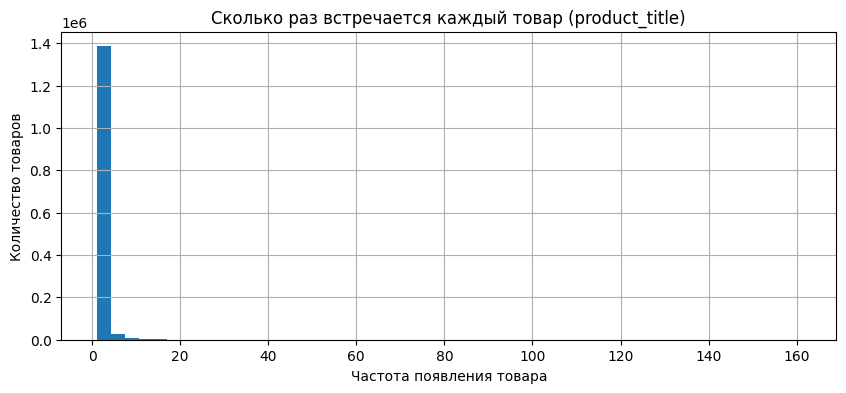

🔝 Топ-10 самых часто встречающихся товаров:
product_title
Pilot                                                                                                                                                                                                     161
Episode 1                                                                                                                                                                                                 157
Currently Unsupervised Novelty Graphic Sarcastic Funny T Shirt XL Black                                                                                                                                    92
変な家                                                                                                                                                                                                        88
Acer (エイサー) Aspire 5 スリム ノートパソコン 15.6インチ フルHD IPS ディスプレイ AMD(アドバンスト・マイクロ・デバイセズ) Ryzen(ライゼン) 3 3200U (日本語配列ではない場合があります)

In [26]:
# Считаем, сколько раз каждый товар встречается
product_counts = df['product_title'].value_counts()

# 📈 Гистограмма
plt.figure(figsize=(10, 4))
product_counts.hist(bins=50)
plt.title("Сколько раз встречается каждый товар (product_title)")
plt.xlabel("Частота появления товара")
plt.ylabel("Количество товаров")
plt.grid(True)
plt.show()

# 🏆 Топ-10 товаров
print("🔝 Топ-10 самых часто встречающихся товаров:")
print(product_counts.head(10))

### Безлайн

In [65]:
# !pip install rank_bm25 nltk scikit-learn pandas matplotlib
# !pip uninstall nltk -y
# !pip install nltk

import nltk
print(nltk.__version__)

3.9.1


In [71]:
import nltk
from nltk.tokenize import word_tokenize
import os

NLTK_DATA_PATH = os.path.expanduser('~/nltk_data')
os.makedirs(NLTK_DATA_PATH, exist_ok=True)
nltk.download('punkt_tab', download_dir=NLTK_DATA_PATH)

nltk.data.path.append(NLTK_DATA_PATH)
# Простой тест — если работает, всё ок
print(word_tokenize("This is a test."))

['This', 'is', 'a', 'test', '.']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/sirius3085/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from rank_bm25 import BM25Okapi
from tqdm import tqdm
import time

# ——— 0. Удобная токенизация текста ———
def tokenize(text: str) -> list[str]:
    return word_tokenize(text.lower())

# ——— 1. Подготовка корпуса товаров ———
print("📦 Подготовка коллекции товаров...")
start = time.perf_counter()
products = df['product_title'].unique().tolist()
tokenized_products = [tokenize(p) for p in tqdm(products, desc="🧼 Токенизация товаров")]
bm25 = BM25Okapi(tokenized_products)
print(f"✅ Индексация BM25 завершена за {time.perf_counter() - start:.2f} сек")

# ——— 2. Универсальный BM25 поисковик ———
class BM25Search:
    def __init__(self, bm25_index, docs):
        self.bm25 = bm25_index
        self.docs = docs

    def top_k(self, query: str, k: int = 10) -> list[str]:
        tokens = tokenize(query)
        scores = self.bm25.get_scores(tokens)
        top_idx = np.argsort(scores)[-k:][::-1]
        return [self.docs[i] for i in top_idx]

# ——— 3. Универсальная метрика Recall@k ———
def evaluate_recall_at_k(queries, true_items, searcher, k=10):
    hits = 0
    for q, true_item in tqdm(zip(queries, true_items), total=len(queries), desc="🔍 Инференс + метрика"):
        predicted = searcher.top_k(q, k)
        if true_item in predicted:
            hits += 1
    return hits / len(queries)

# ——— 4. Пример запуска ———
print("📊 Формируем валидационный сет...")
eval_df = df[df['esci_label'].isin(['Exact', 'Substitute'])].sample(200, random_state=42)
queries = eval_df['query'].tolist()
true_products = eval_df['product_title'].tolist()

print("🚀 Запуск поиска и оценка Recall@10...")
start = time.perf_counter()
bm25_searcher = BM25Search(bm25, products)
recall = evaluate_recall_at_k(queries, true_products, bm25_searcher, k=10)
print(f"✅ Метрика рассчитана за {time.perf_counter() - start:.2f} сек")

print(f"\n📈 Recall@10 (BM25 baseline): {recall:.4f}")

📦 Подготовка коллекции товаров...


🧼 Токенизация товаров: 100%|██████████| 1423918/1423918 [01:50<00:00, 12909.02it/s]


✅ Индексация BM25 завершена за 120.43 сек
📊 Формируем валидационный сет...
🚀 Запуск поиска и оценка Recall@10...


🔍 Инференс + метрика: 100%|██████████| 200/200 [03:37<00:00,  1.09s/it]

✅ Метрика рассчитана за 217.02 сек

📈 Recall@10 (BM25 baseline): 0.1750
